In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('data/lab2_prepared_2.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(234, 12)

In [4]:
# типы колонок
data.dtypes

Country or Dependency     object
Population(2020)          object
Yearly Change            float64
Net Change                object
Density(p/km^2)          float64
Land Area(km^2)           object
Migrants                 float64
Fert Rate                float64
Med Age                  float64
Urban                    float64
World Share              float64
Regions                   object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Country or Dependency     0
Population(2020)          0
Yearly Change             0
Net Change                0
Density(p/km^2)           0
Land Area(km^2)           0
Migrants                 33
Fert Rate                33
Med Age                  33
Urban                    13
World Share               0
Regions                  11
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Country or Dependency,Population(2020),Yearly Change,Net Change,Density(p/km^2),Land Area(km^2),Migrants,Fert Rate,Med Age,Urban,World Share,Regions
0,China,1.439.323.776,0.39,5.540.090,153.000,9.388.211,-348.399,1.7,38.0,61.0,18.47,NaN
1,India,1.380.004.385,0.99,13.586.631,464.000,2.973.190,-532.687,2.2,28.0,35.0,17.70,Asia
2,Indonesia,273.523.615,1.07,2.898.047,151.000,1.811.570,-98.955,2.3,30.0,56.0,3.51,Asia
3,Pakistan,220.892.340,2.00,4.327.022,287.000,770.880,-233.379,3.6,23.0,35.0,2.83,Asia
4,Bangladesh,164.689.383,1.01,1.643.222,1.265,130.170,-369.501,2.1,28.0,39.0,2.11,Asia


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 234


# Обработка пропусков в данных

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((234, 12), (234, 7))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((234, 12), (190, 12))

In [10]:
data.head()

,Country or Dependency,Population(2020),Yearly Change,Net Change,Density(p/km^2),Land Area(km^2),Migrants,Fert Rate,Med Age,Urban,World Share,Regions
0,China,1.439.323.776,0.39,5.540.090,153.000,9.388.211,-348.399,1.7,38.0,61.0,18.47,NaN
1,India,1.380.004.385,0.99,13.586.631,464.000,2.973.190,-532.687,2.2,28.0,35.0,17.70,Asia
2,Indonesia,273.523.615,1.07,2.898.047,151.000,1.811.570,-98.955,2.3,30.0,56.0,3.51,Asia
3,Pakistan,220.892.340,2.00,4.327.022,287.000,770.880,-233.379,3.6,23.0,35.0,2.83,Asia
4,Bangladesh,164.689.383,1.01,1.643.222,1.265,130.170,-369.501,2.1,28.0,39.0,2.11,Asia


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Country or Dependency,Population(2020),Yearly Change,Net Change,Density(p/km^2),Land Area(km^2),Migrants,Fert Rate,Med Age,Urban,World Share,Regions
0,China,1.439.323.776,0.39,5.540.090,153.000,9.388.211,-348.399,1.7,38.0,61.0,18.47,0
1,India,1.380.004.385,0.99,13.586.631,464.000,2.973.190,-532.687,2.2,28.0,35.0,17.70,Asia
2,Indonesia,273.523.615,1.07,2.898.047,151.000,1.811.570,-98.955,2.3,30.0,56.0,3.51,Asia
3,Pakistan,220.892.340,2.00,4.327.022,287.000,770.880,-233.379,3.6,23.0,35.0,2.83,Asia
4,Bangladesh,164.689.383,1.01,1.643.222,1.265,130.170,-369.501,2.1,28.0,39.0,2.11,Asia


### Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Migrants. Тип данных float64. Количество пустых значений 33, 14.1%.
Колонка Fert Rate. Тип данных float64. Количество пустых значений 33, 14.1%.
Колонка Med Age. Тип данных float64. Количество пустых значений 33, 14.1%.
Колонка Urban. Тип данных float64. Количество пустых значений 13, 5.56%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Migrants,Fert Rate,Med Age,Urban
0,-348.399,1.7,38.0,61.0
1,-532.687,2.2,28.0,35.0
2,-98.955,2.3,30.0,56.0
3,-233.379,3.6,23.0,35.0
4,-369.501,2.1,28.0,39.0
...,...,...,...,...
229,NaN,NaN,NaN,62.0
230,NaN,NaN,NaN,0.0
231,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,46.0


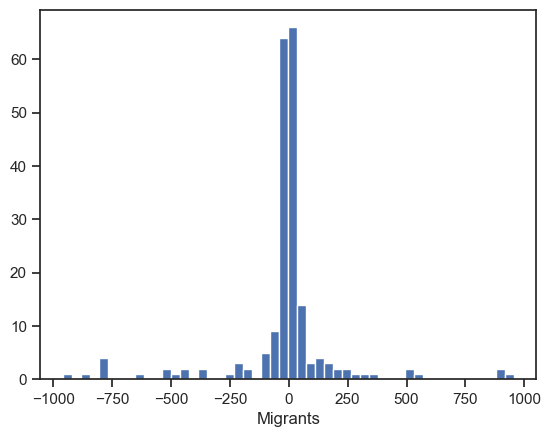

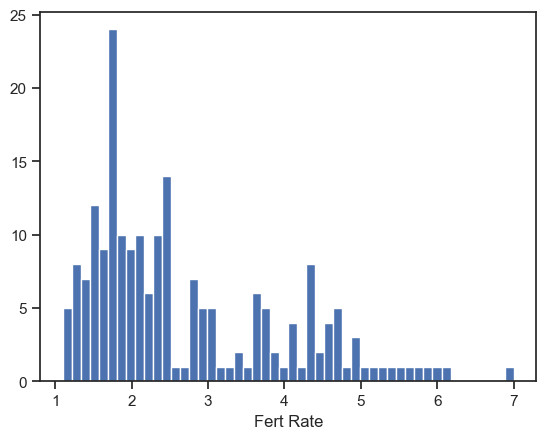

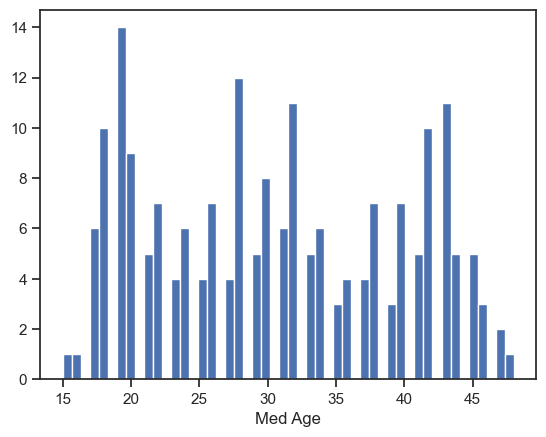

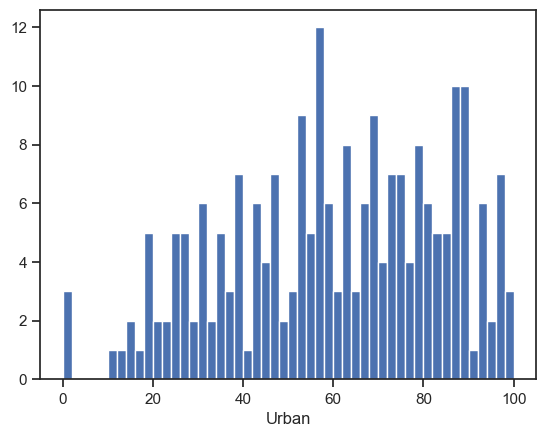

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
data_num_Fert_Rate = data_num[['Fert Rate']]
data_num_Fert_Rate.head()

,Fert Rate
0,1.7
1,2.2
2,2.3
3,3.6
4,2.1


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Fert_Rate)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Fert_Rate)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398,
        2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398,
        2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398,
        2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398,
        2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398, 2.6920398,
        2.6920398, 2.6920398, 2.6920398]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
        2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
        2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3]))

In [22]:
strategies[2], test_num_impute(strategies[2])

C:\Users\prite\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


('most_frequent',
 array([1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8,
        1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8,
        1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8]))

In [23]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [24]:
data[['Urban']].describe()

,Urban
count,221.000000
mean,59.714932
std,23.818160
min,0.000000
25%,43.000000
50%,62.000000
75%,79.000000
max,100.000000


In [25]:
test_num_impute_col(data, 'Urban', strategies[0])

('Urban', 'mean', 13, 59.71493212669683, 59.71493212669683)

In [26]:
test_num_impute_col(data, 'Urban', strategies[1])

('Urban', 'median', 13, 62.0, 62.0)

In [27]:
test_num_impute_col(data, 'Urban', strategies[2])

C:\Users\prite\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


('Urban', 'most_frequent', 13, 57.0, 57.0)

### Обработка пропусков в категориальных данных

In [28]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Regions. Тип данных object. Количество пустых значений 11, 4.7%.


In [29]:
cat_temp_data = data[['Regions']]
cat_temp_data.head()

,Regions
0,NaN
1,Asia
2,Asia
3,Asia
4,Asia


In [30]:
cat_temp_data['Regions'].unique()

array([nan, 'Asia', 'Africa', 'Europe', 'Latin America & Caribbean',
       'Northern America', 'Oceania'], dtype=object)

In [31]:
cat_temp_data[cat_temp_data['Regions'].isnull()].shape

(11, 1)

In [32]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Africa'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
       ['Africa']

In [33]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Africa', 'Asia', 'Europe', 'Latin America & Caribbean',
       'Northern America', 'Oceania'], dtype=object)

In [34]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['NA'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['Asia'],
       ['NA'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
       ['Africa'],
      

In [35]:
np.unique(data_imp3)

array(['Africa', 'Asia', 'Europe', 'Latin America & Caribbean', 'NA',
       'Northern America', 'Oceania'], dtype=object)

In [36]:
data_imp3[data_imp3=='NA'].size

11

# Преобразование категориальных признаков в числовые

In [37]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Africa
1,Asia
2,Asia
3,Asia
4,Asia
...,...
229,Oceania
230,Africa
231,Oceania
232,Oceania


## Кодирование категорий целочисленными значениями (label encoding)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
cat_enc['c1'].unique()

array(['Africa', 'Asia', 'Europe', 'Latin America & Caribbean',
       'Northern America', 'Oceania'], dtype=object)

In [40]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [41]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['Africa', 'Asia', 'Europe', 'Latin America & Caribbean',
       'Northern America', 'Oceania'], dtype=object)

In [42]:
cat_enc_le

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 0, 4, 0, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 0])

In [43]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5])

In [44]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['Africa', 'Asia', 'Europe', 'Latin America & Caribbean'],
      dtype=object)

## Кодирование категорий наборами бинарных значений

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [47]:
cat_enc.shape

(234, 1)

In [48]:
cat_enc_ohe.shape

(234, 6)

In [49]:
cat_enc_ohe

<234x6 sparse matrix of type '<class 'numpy.float64'>'
	with 234 stored elements in Compressed Sparse Row format>

In [50]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]])

In [51]:
cat_enc.head(10)

,c1
0,Africa
1,Asia
2,Asia
3,Asia
4,Asia
5,Asia
6,Asia
7,Asia
8,Asia
9,Asia


In [52]:
pd.get_dummies(cat_enc).head()

,c1_Africa,c1_Asia,c1_Europe,c1_Latin America & Caribbean,c1_Northern America,c1_Oceania
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [53]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Regions_Africa,Regions_Asia,Regions_Europe,Regions_Latin America & Caribbean,Regions_Northern America,Regions_Oceania,Regions_nan
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [55]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Migrants']])

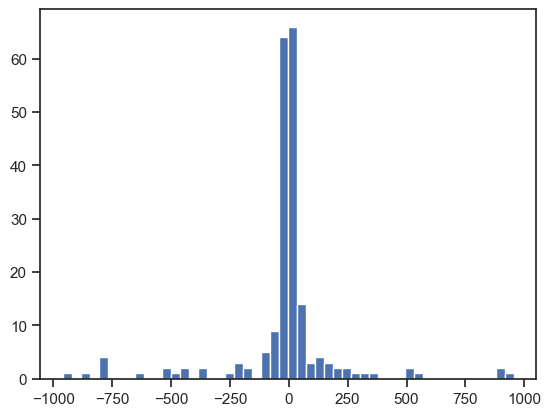

In [56]:
plt.hist(data['Migrants'], 50)
plt.show()

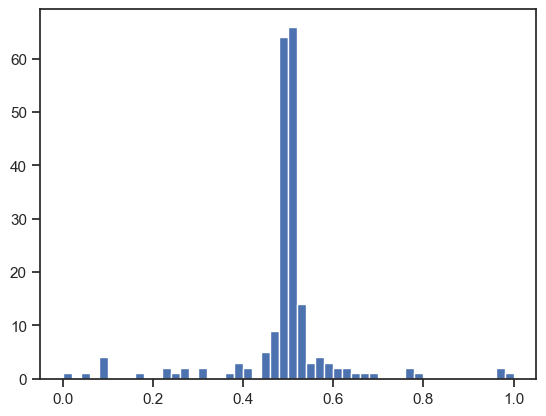

In [57]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки

In [58]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Migrants']])

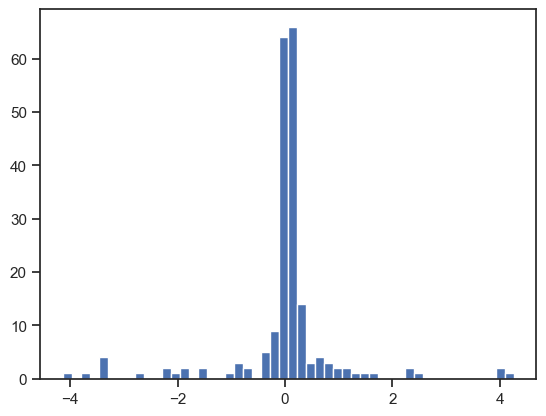

In [59]:
plt.hist(sc2_data, 50)
plt.show()